In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite

# Median Comparison

In [16]:
# query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1"]
query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.5) or (dm15_from_fits >= .5 and dm15_from_fits < 1.5))"]

In [17]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot='b', medmean=1, verbose=False, gini_balance=True, combine=True)
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(query_max), query_max, boot='b', medmean=2, verbose=False, gini_balance=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.5) or (dm15_from_fits >= .5 and dm15_from_fits < 1.5))
155 Total Spectra found
105 questionable files currently ignored
(5, 'questionable spectra removed', 150, 'spectra left')
(2, 'Peculiar Ias removed', 148, 'spectra left')
135 valid spectra found
Arrays cleaned
4 spectra may have telluric contamination
89 total SNe
86 SNe with host corrections
Gini balancing...
Balanced after 22 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.5) or (dm15_from_fits >= .5 and dm15_from_fits < 1.5))
155 Total Spectra found
105 questionable files currently ignored
(5, 'questionable spectra removed', 150, 'spectra left')
(2, 'Peculiar Ias removed', 148, 'spectra left')
135 v

Phase:  0.14674753893
dm15:  1.07628015883
Redshift:  0.0152348583653
Phase:  0.154073407165
dm15:  1.0560259433
Redshift:  0.015433739345


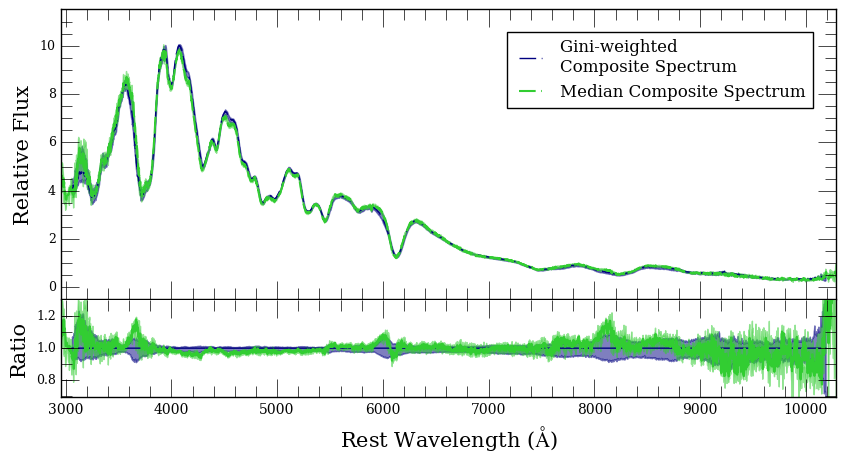

In [20]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12,
                     legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"], 
                     savename = 'main_composites_updated/med_comparison_large')
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12, include_phase_dm15 = True,
#                      legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"])

In [45]:
# query_max_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -.1 and phase <= .1"]
query_max_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -.2 and phase <= .2 and ((dm15_source >= .5 and dm15_source < 1.2) or (dm15_from_fits >= .5 and dm15_from_fits < 1.2))"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.5) or (dm15_from_fits >= 1. and dm15_from_fits < 1.5))"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [46]:
comps_max_dm15, sn_arrays_max_dm15, boot_sn_arrays_max_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot='b', medmean=1, verbose=False, gini_balance=True, combine=True)
# comps_max_med_dm15, sn_arrays_max_med_dm15, boot_sn_arrays_max_med_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot='b', medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -.2 and phase <= .2 and ((dm15_source >= .5 and dm15_source < 1.2) or (dm15_from_fits >= .5 and dm15_from_fits < 1.2))
20 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 19, 'spectra left')
(0, 'Peculiar Ias removed', 19, 'spectra left')
18 valid spectra found
Arrays cleaned
0 spectra may have telluric contamination
17 total SNe
17 SNe with host corrections
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.106360285585
dm15:  1.06201696033
Redshift:  0.0135260520561
Phase:  0.0369348980021
dm15:  1.06376255423
Redshift:  0.0153992759108


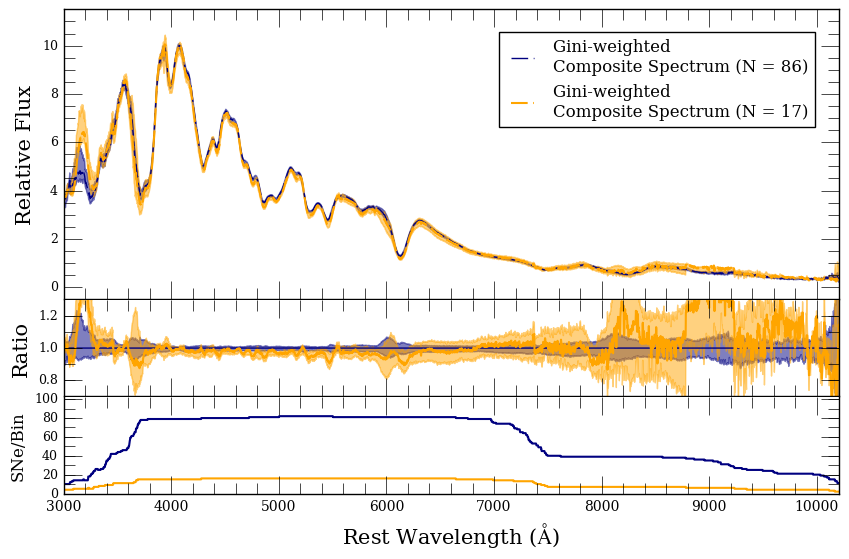

In [48]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_dm15[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp3"
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],
                     legend_labels = ["Gini-weighted \nComposite Spectrum (N = 86)", "Gini-weighted \nComposite Spectrum (N = 17)"],
                     savename='main_composites_updated/sample_size_comparison')
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],
#                      legend_labels = ["Composite Spectrum \n"+r"($-1 < \tau\ < +1$)", "Composite Spectrum \n"+r"($-0.1 < \tau\ < +0.1$)"])

# Gini Comparison

In [9]:
gini_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32"]

In [10]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(gini_query), gini_query, boot='nb', medmean=2, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini, sn_arrays_max_gini, boot_sn_arrays_max_gini = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(9, 'questionable spectra removed', 145, 'spectra left')
(4, 'Peculiar Ias removed', 141, 'spectra left')
120 spectra with host corrections
173 questionable files currently ignored
87 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
87 SNs with host corrections
Creating composite...
Done.
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(9, 'questionable spectra removed', 145, 'spectra left')
(4, 'Peculiar Ias removed', 141, 'spectra left')
120 spectra with host corrections
173 questionable files currently ignored
87 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
87 SNs with host correc

2001el


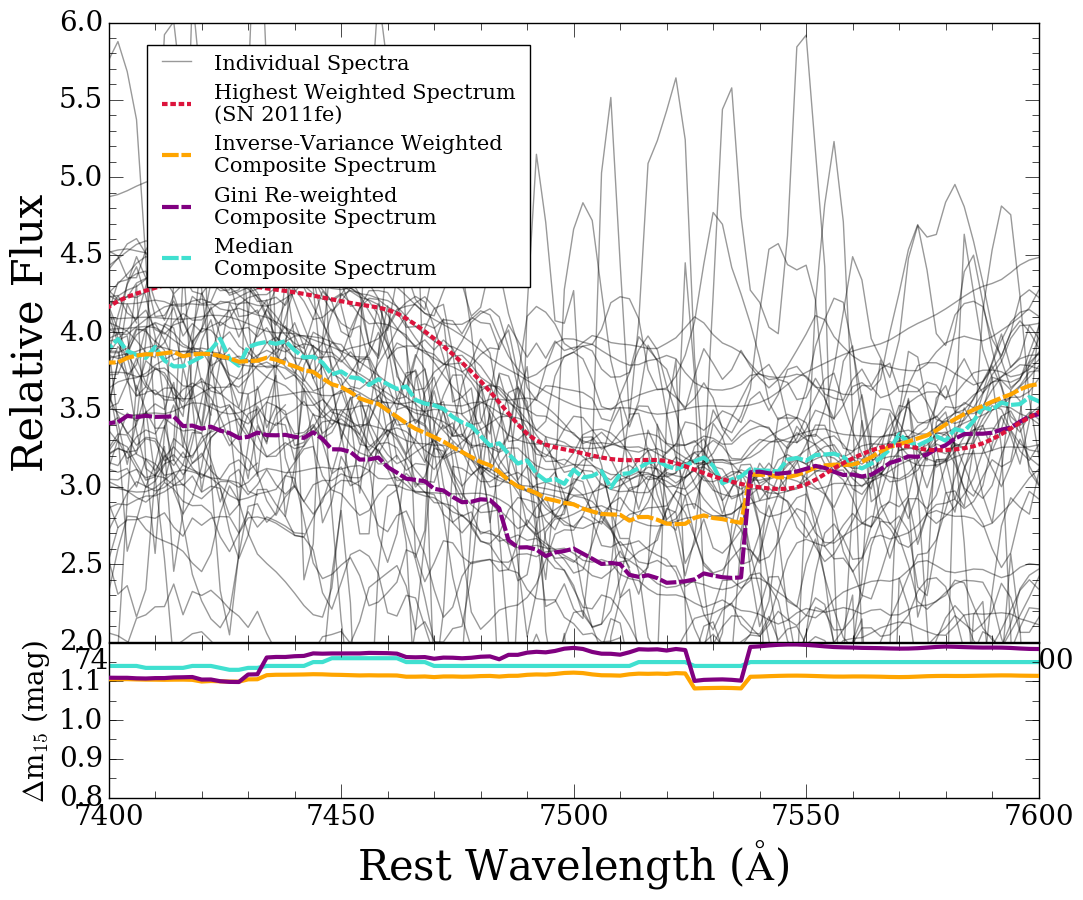

In [15]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons.append(comps_max_gini[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0], comp2 = comparisons[2], comp3 = comparisons[1], one_color = True, xlim = [7400,7600], ylim = [2,6], dm15=True)
# query_db.scaled_plot([comparisons[0], comparisons[1]], min_num_show=1, xlim = [2500,4000])
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0])

In [16]:
# gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5))"]
gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [17]:
comps_max2, sn_arrays_max2, boot_sn_arrays_max2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini2, sn_arrays_max_gini2, boot_sn_arrays_max_gini2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050614-hst.flm']
(4, 'questionable spectra removed', 56, 'spectra left')
(0, 'Peculiar Ias removed', 56, 'spectra left')
55 spectra with host corrections
173 questionable files currently ignored
14 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
14 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fi

1996x


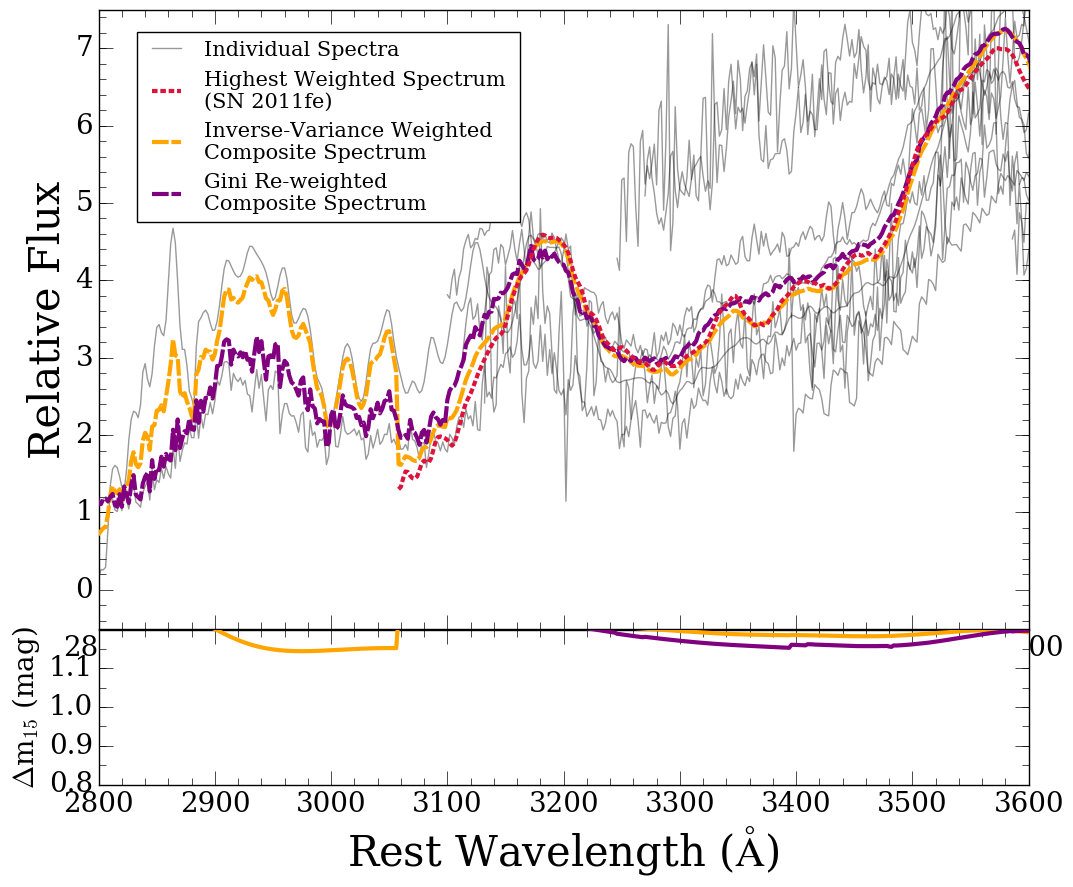

In [23]:
comparisons = []
comparisons.append(comps_max2[0])
comparisons.append(comps_max_gini2[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max2[0], comp2 = comparisons[1], one_color = True, xlim = [2800,3600], ylim = [-.5,7.5], boots=False, dm15=True)

In [7]:
# gini_query_3 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 2 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.1) or (dm15_from_fits >= .9 and dm15_from_fits < 1.1))"]
gini_query_3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))"]

In [8]:
comps_max3, sn_arrays_max3, boot_sn_arrays_max3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=False)
comps_max_med3, sn_arrays_max_med3, boot_sn_arrays_max_med3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=2, verbose=False, gini_balance=False)
comps_max_gini3, sn_arrays_max_gini3, boot_sn_arrays_max_gini3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
261 Total Spectra found
105 questionable files currently ignored
(14, 'questionable spectra removed', 247, 'spectra left')
(2, 'Peculiar Ias removed', 245, 'spectra left')
211 valid spectra found
Arrays cleaned
11 spectra may have telluric contamination


composite.py:1197: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1234: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


92 total SNe
89 SNe with host corrections
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
261 Total Spectra found
105 questionable files currently ignored
(14, 'questionable spectra removed', 247, 'spectra left')
(2, 'Peculiar Ias removed', 245, 'spectra left')
211 valid spectra found
Arrays cleaned
11 spectra may have telluric contamination
92 total SNe
89 SNe with host corrections
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
261 Total Spectra found
105 questionable files currently ignored
(14, 'questionable spectra removed', 247, 'spectra left')
(2, 'Peculiar Ias removed', 245, 'spectra left')
211 valid spectra found
Arrays cleaned
11 spectra may have telluric cont

gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 26 iterations


2011fe_combined


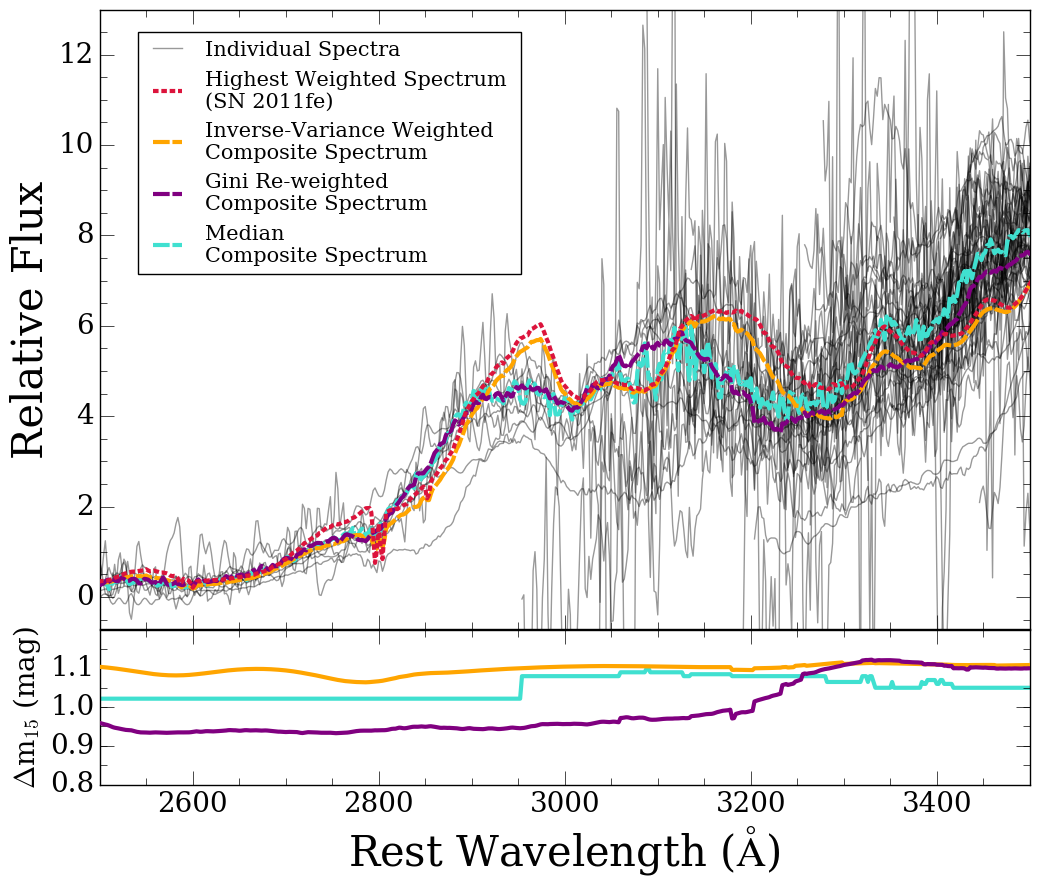

In [11]:
comparisons = []
comparisons.append(comps_max3[0])
comparisons.append(comps_max_gini3[0])
comparisons.append(comps_max_med3[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True, savename='gini_comparison')
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], one_color = True, xlim = [2000,4500], ylim = [-.07,1.3], boots=False)

## Reddening Effects

In [25]:
red_query = ['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000']

In [39]:
comps_red, sn_arrays_red, boot_sn_arrays_red = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=.5)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
sn1999ac-19990312-ui-corrected.flm has low reddening!
sn2001fe-20011115-ui.flm has low reddening!
sn2002ha-20021102-ui-corrected.flm has low reddening!
sn2002he-20021106.649-joined.flm has low reddening!
sn2003cq-20030408-ui.flm has low reddening!
sn2005ag-20050212.596-br.flm has low reddening!
sn2005cf-20050611.6-uvot.flm has low reddening!
sn2005ms-20060106.400-ui.flm has low reddening!
sn2006ej-20060824.430-ui.flm has low reddening!
sn2006n-20060123.286-ui.flm has lo

In [29]:
comps, sn_arrays, boot_sn_arrays = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=None)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
95 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 31 iterations
Done.


Phase:  -1.08717964622
dm15:  1.15587024547
Redshift:  0.0114969515676
Phase:  -1.06937335433
dm15:  1.16123711719
Redshift:  0.0113645512883


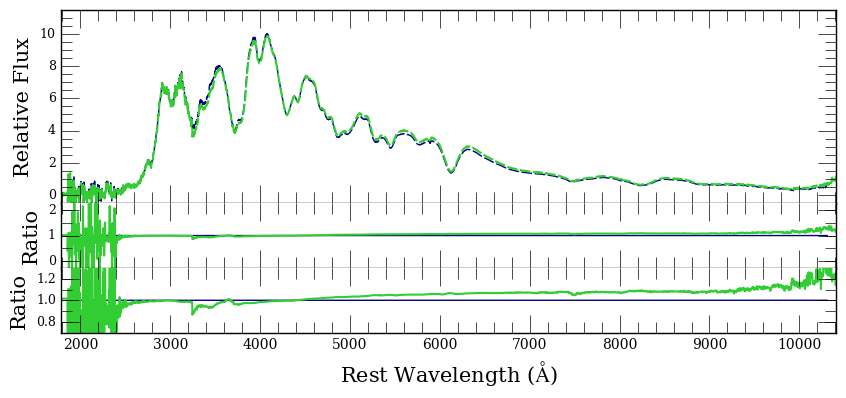

In [40]:
comparisons = []
comparisons.append(comps[0])
comparisons.append(comps_red[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.scaled_plot([comparisons[0], comparisons[1]], dashes = [8, 2])